Our first colab notebook :) 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    
from sklearn.metrics import pairwise_distances   
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 #Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/df_audio_features_5000.csv'
audio = pd.read_csv(path, index_col=["name", "artist"])
audio.drop(['id', "duration_ms", "html", "type", "key", "mode", "loudness", "time_signature", "liveness"], axis=1, inplace=True)
audio.drop_duplicates(inplace=True)
#audio.index = audio.index.str.strip()
audio.describe()
audio

,,danceability,energy,speechiness,acousticness,instrumentalness,valence,tempo
name,artist,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,658.0000,259.00000,0.0705,694.0,0.000059,306.0000,110376.00
Saudade De Bahia,Antônio Carlos Jobim,742.0000,399.00000,0.0346,217.0,0.000002,693.0000,125039.00
"Canta Canta, Minha Gente",Martinho Da Vila,851.0000,0.73000,347.0000,453.0,0.000063,905.0000,93698.00
Mulher Eu Sei,Chico César,705.0000,0.05020,0.0471,879.0,0.000041,524.0000,106802.00
Rosa Morena,Kurt Elling,651.0000,119.00000,38.0000,916.0,0.000343,402.0000,120941.00
...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,202.0000,0.06940,0.0473,917.0,715.000000,0.0655,87906.00
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,188.0000,101.00000,0.0442,855.0,426.000000,0.0355,83134.00
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.0596,0.00093,0.0434,951.0,969.000000,0.0344,71573.00


In [ ]:
#audio_df= audio.drop(['liveness','time_signature', "loudness"], axis=1, inplace=True)


In [ ]:
df_sk_pre_robust = RobustScaler().fit_transform(audio)
scaled_audio_robust = pd.DataFrame(df_sk_pre_robust, columns=audio.columns, index=audio.index)

In [ ]:
audio_kmeans = KMeans(n_clusters=5).fit(scaled_audio_robust)
audio_kmeans

KMeans(n_clusters=5)

In [ ]:
audio_kmeans.inertia_

12566.798341987318

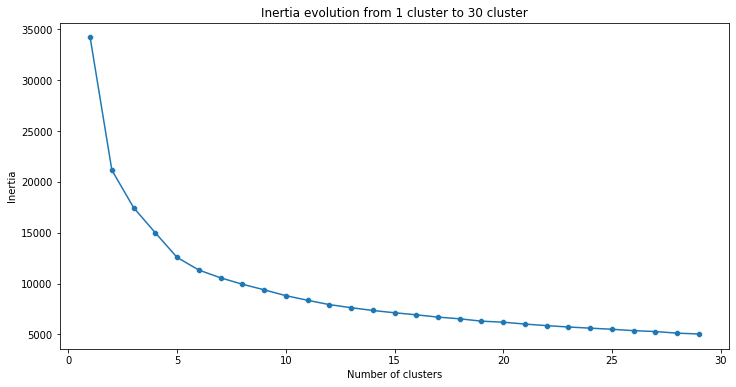

In [ ]:
max_k = 30
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(scaled_audio_robust).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia)
sns.scatterplot(x=range(1, max_k), y=inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The silhouette coefficient can vary between -1 and +1: 

|   |   |
|---|---|
|+1   | the instance is well inside its own cluster and far from other clusters.  |
|0   | the instance is close to a cluster boundary.   |
|-1   | the instance may have been assigned to the wrong cluster.  |

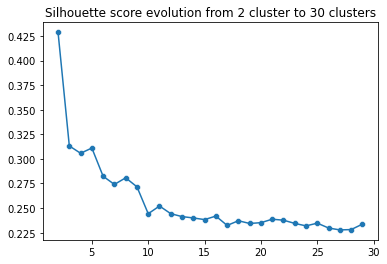

In [ ]:
max_k = 30
sil_score = []

for k in range(2, max_k): 
    labels = KMeans(n_clusters=k).fit(scaled_audio_robust).labels_
    sil_score.append(silhouette_score(scaled_audio_robust, labels))

plt.title(f'Silhouette score evolution from 2 cluster to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=sil_score)
sns.scatterplot(x=range(2, max_k), y=sil_score)
plt.show()

In [ ]:
plot_data = pd.DataFrame(scaled_audio_robust)
plot_data['cluster'] = audio_kmeans.labels_
plot_data.groupby(by="cluster").sample(5)

,,danceability,energy,speechiness,acousticness,instrumentalness,valence,tempo,cluster
name,artist,,,,,,,,
Immense Intense Suspense Barricade,Phlebotomized,-0.708531,0.038801,1.176178,0.001532,1.745917,-0.011719,1.670470,0
Komm zur Ruhr,Herbert Grönemeyer,0.023697,-0.322751,-0.000416,0.291389,-0.000004,-0.701018,-0.569914,0
Save Tonight,Eagle-Eye Cherry,0.135071,0.079365,-0.000581,-0.000538,-0.000004,0.437500,0.150000,0
Gangsta's Paradise,Coolio,0.369668,-0.322751,-0.000033,-0.000403,-0.000004,0.054688,-0.848787,0
I'd Really Love to See You Tonight - 2012 Remaster,England Dan & John Ford Coley,0.206161,0.123457,-0.000630,0.403190,-0.000004,0.599609,0.135898,0
Familiar,Liam Payne,0.343602,0.190476,6.999355,-0.000505,-0.000004,1.072266,-0.520660,1
Mayor que yo,Tonny Tun Tun,-1.161943,0.169312,7.042172,0.976692,-0.000004,0.761719,1.666705,1
Crazy In Love (feat. Jay-Z),Beyoncé,0.367299,-1.227919,4.837072,-0.000533,-0.000004,0.628906,-0.363798,1
All Mine,Kanye West,1.028436,-0.686067,7.234851,0.258262,-0.000004,-0.183594,0.215782,1


In [ ]:
#find centers
centers = np.array(audio_kmeans.cluster_centers_)
centers

array([[ 0.03459947, -0.04231779,  0.0600377 ,  0.25155276,  0.29346786,
         0.2218107 ,  0.23311567],
       [ 0.12397758, -0.04717725,  6.52918571,  0.27017002,  0.12712528,
         0.19746676, -0.09393329],
       [-0.35043623, -0.96378643,  0.08479367,  1.74671975,  0.94767509,
        -0.29727312, -0.20351935],
       [-0.21638839,  0.12800421,  3.04761543,  0.17152325,  0.5183489 ,
        -0.07992019,  0.05527261],
       [-0.14647306, -0.218808  ,  0.37085226,  0.5610281 ,  0.5157841 ,
         0.05967464, -2.8607069 ]])

In [ ]:
#create 10 seperate dfs
cluster0 = scaled_audio_robust[scaled_audio_robust.cluster == 0]
cluster1 = scaled_audio_robust[scaled_audio_robust.cluster == 1]
cluster2 = scaled_audio_robust[scaled_audio_robust.cluster == 2]
cluster3 = scaled_audio_robust[scaled_audio_robust.cluster == 3]
cluster4 = scaled_audio_robust[scaled_audio_robust.cluster == 4]

In [ ]:
cluster1

,,danceability,energy,speechiness,acousticness,instrumentalness,valence,tempo,cluster
name,artist,,,,,,,,
"Canta Canta, Minha Gente",Martinho Da Vila,0.853081,-1.227989,7.427529,0.937354,-0.000004,1.066406,-0.501959,1
O Meu Amor É Glòria,Sílvia Pérez Cruz,0.030806,0.063492,8.326696,1.440462,-0.000004,1.029297,-0.429505,1
Karoliina Kaunis,Maria Gasolina,0.620853,-0.850088,6.271457,1.278971,0.000005,0.044922,0.423995,1
Aquarela Do Brasil,Gal Costa,0.146919,-1.228307,8.519375,0.001118,-0.000003,0.625000,0.592760,1
Vai (Menina amanhã de manhã),Tom Zé,0.426540,-1.228166,5.072568,1.831768,-0.000004,0.849609,0.355939,1
...,...,...,...,...,...,...,...,...,...
All Of My Help - Live,Ricky Dillard,-0.111374,0.303351,6.314275,0.318304,-0.000004,0.160156,1.673856,1
His Love,The Clark Sisters,-1.161825,0.343915,5.415108,0.581245,-0.000004,0.787109,-0.598117,1
Happy - Live/Remastered,Tasha Cobbs Leonard,-0.213270,0.331570,9.525586,0.355571,-0.000004,0.156250,1.500922,1


In [ ]:
#find 50 nearest songs for each cluster df
distance = pd.DataFrame(pairwise_distances(scaled_audio_robust.drop("cluster", axis=1), centers))

distance

,0,1,2,3,4
0,1.536596,6.685382,1.283607,3.515632,3.086488
1,0.929855,6.594737,2.195684,3.363545,3.367326
2,7.626650,2.028735,7.676971,4.964462,7.668058
3,2.086362,6.827565,1.449597,3.853835,3.277156
4,2.109629,6.036951,1.510761,3.155088,3.527926
...,...,...,...,...,...
5153,2.743042,7.078506,0.889088,4.001802,3.084728
5154,2.459579,6.955200,0.802737,3.828356,2.771093
5155,3.309757,7.315501,1.619826,4.340910,3.154608
5156,2.829226,7.080743,1.199774,4.049919,2.629207


In [ ]:
#with song names
distance2 = pd.DataFrame(pairwise_distances(scaled_audio_robust.drop("cluster", axis=1), centers), index=scaled_audio_robust.index)

distance2

,,0,1,2,3,4
name,artist,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,1.536596,6.685382,1.283607,3.515632,3.086488
Saudade De Bahia,Antônio Carlos Jobim,0.929855,6.594737,2.195684,3.363545,3.367326
"Canta Canta, Minha Gente",Martinho Da Vila,7.626650,2.028735,7.676971,4.964462,7.668058
Mulher Eu Sei,Chico César,2.086362,6.827565,1.449597,3.853835,3.277156
Rosa Morena,Kurt Elling,2.109629,6.036951,1.510761,3.155088,3.527926
...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,2.743042,7.078506,0.889088,4.001802,3.084728
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,2.459579,6.955200,0.802737,3.828356,2.771093
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,3.309757,7.315501,1.619826,4.340910,3.154608


In [ ]:
#cluster0["distance_to_center"] = pd.DataFrame(pairwise_distances(cluster0.drop(["cluster", "distance_to_center"], axis=1), centers[[0]]))
#cluster0
cluster_dist_0 = pd.DataFrame(pairwise_distances(cluster0.drop(["cluster"], axis=1), centers[[0]]),index=cluster0.index)
cluster_dist_1 = pd.DataFrame(pairwise_distances(cluster1.drop(["cluster"], axis=1), centers[[1]]),index=cluster1.index)
cluster_dist_2 = pd.DataFrame(pairwise_distances(cluster2.drop(["cluster"], axis=1), centers[[2]]),index=cluster2.index)
cluster_dist_3 = pd.DataFrame(pairwise_distances(cluster3.drop(["cluster"], axis=1), centers[[3]]),index=cluster3.index)
cluster_dist_4 = pd.DataFrame(pairwise_distances(cluster4.drop(["cluster"], axis=1), centers[[4]]),index=cluster4.index)

In [ ]:
cluster_dist_0.sort_values(by=0, inplace=True)
cluster_dist_0.head(50)

,,0
name,artist,
All In White,The Vaccines,0.369885
I Saw the Light - 2015 Remaster,Todd Rundgren,0.417991
Turn It Down (with Rebecca & Fiona) - Radio Edit,Kaskade,0.422014
Because the Night,Patti Smith,0.433177
Euphoria,Usher,0.435778
Bang My Head (feat. Sia),David Guetta,0.436167
Reload - Vocal Version / Radio Edit,Sebastian Ingrosso,0.437440
Flashdance...What a Feeling - Radio Edit,Irene Cara,0.447129
Willkommen,Rosenstolz,0.451592


In [ ]:
cluster_dist_1.sort_values(by=0, inplace=True)
cluster_dist_1.head(50)

,,0
name,artist,
We Fly High,Jim Jones,0.605535
Schwung in die Kiste,Die Orsons,0.629025
American Boy,Estelle,0.690463
I Know What You Want (feat. Flipmode Squad),Busta Rhymes,0.742888
Tusa,KAROL G,0.798676
Body Talk (Mammoth),Dimitri Vegas & Like Mike,0.812646
D.A.N.C.E,Justice,0.833506
Thrift Shop (feat. Wanz),Macklemore & Ryan Lewis,0.913297
US,Moon Jong Up,0.963494


In [ ]:
cluster_dist_2.sort_values(by=0, inplace=True)
cluster_dist_2.head(50)

,,0
name,artist,
My Foolish Heart,Bill Evans Trio,0.395698
Young And Foolish,Bill Evans,0.505453
Symphony No. 3,Polish National Radio Symphony Orchestra,0.645671
Conference Of The Birds,Dave Holland Quartet,0.703749
'Round Midnight,Thelonious Monk,0.713091
"Lob der Frauen, Polka Mazurka, Op. 315",Johann Strauss II,0.729139
"Beethoven: Symphony No. 7 in A Major, Op. 92: I. Poco sostenuto - Vivace",Ludwig van Beethoven,0.738260
Essence Of Human Pain,Broken Hope,0.750163
"Il barbiere di Siviglia (The Barber of Seville), Act 1: ""Largo al factotum""",Gioachino Rossini,0.752454


In [ ]:
cluster_dist_3.sort_values(by=0, inplace=True)
cluster_dist_3.head(50)

,,0
name,artist,
The Alphabeat,David Guetta,0.562280
Unholy Blasphemies,Morbid Angel,0.588992
Bind Torture Kill,Suffocation,0.615382
Soulless - remastered 2003,Grave,0.631610
Roots Bloody Roots,Sepultura,0.674024
Engorged With Impiety,Broken Hope,0.684972
Wolf Among Sheep,Broken Hope,0.712520
Darkest Dream,Monstrosity,0.717537
Regorge in the Morgue,Vomitory,0.723694


In [ ]:
cluster_dist_4.sort_values(by=0, inplace=True)
cluster_dist_4.head(50)

,,0
name,artist,
Blackeye,Love Inks,0.659105
When You Say Nothing At All,Ronan Keating,0.716644
Inhabit Our Praise,Cross Worship,0.732803
Nena Maldición (feat. Lenny Tavárez),Lenny Tavárez,0.736793
Angels,Robbie Williams,0.743218
Let It Fall - Live,Tasha Cobbs Leonard,0.767835
What I Did for Love (feat. Emeli Sandé),David Guetta,0.784606
SHE'S THE ONE,Monsta X,0.828100
Platonic Disease,Obituary,0.835925
